In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.sort_values(by = 'quality', ascending = False, inplace = True)

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
1403,7.2,0.33,0.33,1.7,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,8
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8
1061,9.1,0.40,0.50,1.8,0.071,7.0,16.0,0.99462,3.21,0.69,12.5,8
1202,8.6,0.42,0.39,1.8,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,8


# Exploratory Data Analysis

In [5]:
list_of_columns = df.columns.values.tolist()
list_of_columns

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

### Splitting the quality of wines into 3 groups (Low, Medium, & High) ----> pd.qcut ( )

In [6]:
wine_quality_groups = pd.qcut(df['quality'], 3, labels = ['Low', 'Medium', 'High'])

In [7]:
df_quartile = df.copy(deep = True)

In [8]:
df_quartile.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
1403,7.2,0.33,0.33,1.7,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,8
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8
1061,9.1,0.40,0.50,1.8,0.071,7.0,16.0,0.99462,3.21,0.69,12.5,8
1202,8.6,0.42,0.39,1.8,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,8


In [9]:
df_quartile['Quality Quartile'] = wine_quality_groups
df_quartile[['quality', 'Quality Quartile']].iloc[:10]

,quality,Quality Quartile
495,8,High
1403,8,High
390,8,High
1061,8,High
1202,8,High
828,8,High
481,8,High
455,8,High
1449,8,High
440,8,High


In [10]:
df_quartile['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [11]:
value_counts = df_quartile['Quality Quartile'].value_counts()
value_counts

Low       744
Medium    638
High      217
Name: Quality Quartile, dtype: int64

### Examining the fractions of Low, Medium, and High quality wines

In [12]:
## Low Quality Wines

value_counts[0] / value_counts.sum()

0.4652908067542214

In [13]:
## Medium Quality Wines

value_counts[1] / value_counts.sum()

0.3989993746091307

In [14]:
## High Quality Wines

value_counts[2] / value_counts.sum()

0.1357098186366479

### Looking at the average predictor values for 'Low', 'Medium', and 'High' quality wines defined by pd.qcut

In [15]:
pivoted_quartile = pd.pivot_table(df_quartile, index = 'Quality Quartile', values = list_of_columns, aggfunc = median)
pivoted_quartile

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,quality,residual sugar,sulphates,total sulfur dioxide,volatile acidity
Quality Quartile,,,,,,,,,,,,
Low,9.7,0.081,0.22,0.996935,7.8,14.0,3.31,5,2.2,0.58,45.0,0.59
Medium,10.5,0.078,0.26,0.996560,7.9,14.0,3.32,6,2.2,0.64,35.0,0.49
High,11.6,0.073,0.40,0.995720,8.7,11.0,3.27,7,2.3,0.74,27.0,0.37


### Plotting the top 5 most common 'citric acid' values from our data set -------> value_counts ( )

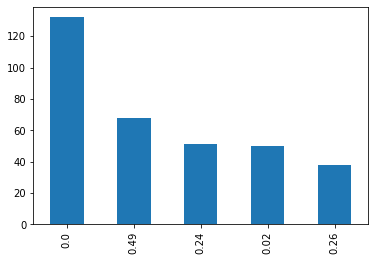

In [16]:
## plotting the top 5 most common citric acid values from our data set
top_citric_acid = df_quartile['citric acid'].value_counts().iloc[:5,].plot(kind = 'bar')

### Plotting the top 5 most common 'alcohol' values from our data set

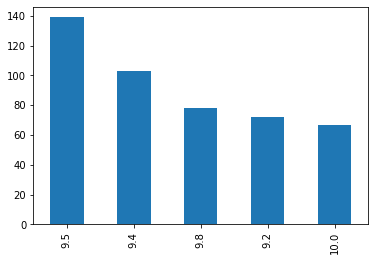

In [17]:
top_citric_acid = df_quartile['alcohol'].value_counts().iloc[:5,].plot(kind = 'bar')

### Box plots for each of the predictors

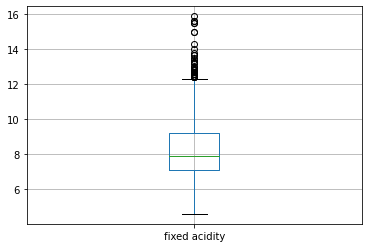

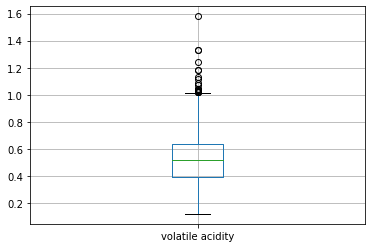

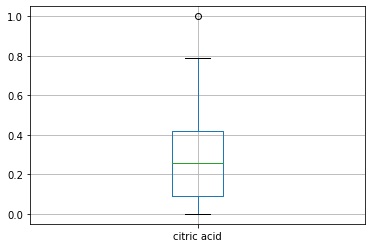

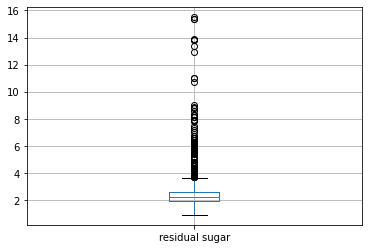

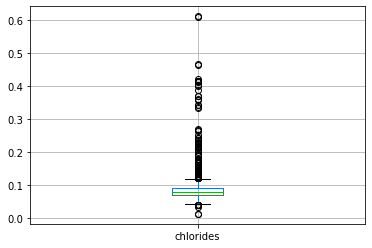

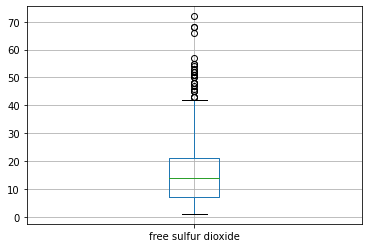

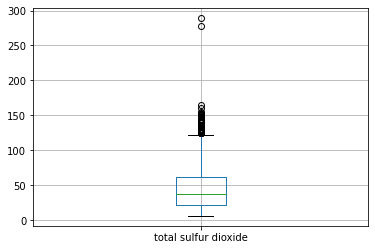

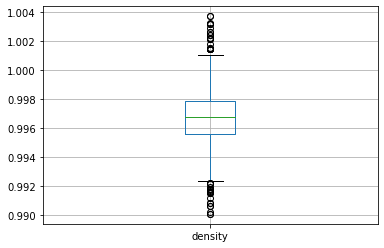

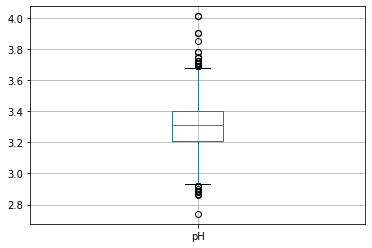

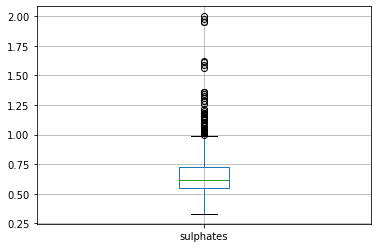

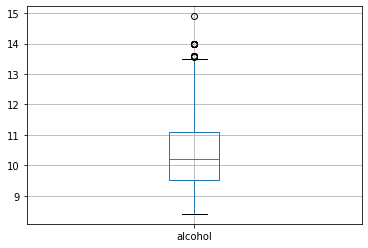

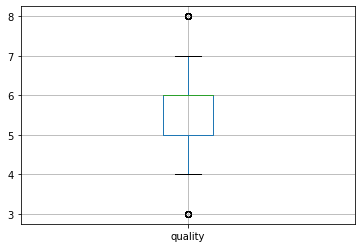

In [18]:
for predictor in list_of_columns:
    df_quartile.boxplot(column = predictor)
    show()

###  Median predictor values for each wine quality ------> pd.pivot_table ( )

In [19]:
## the average predictor values for each wine quality
pivoted_median = pd.pivot_table(df_quartile, index = 'quality', values = list_of_columns, aggfunc = median)
pivoted_median.iloc[:20, :11]

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,
3,9.925,0.0905,0.035,0.997565,7.50,6.0,3.39,2.1,0.545,15.0,0.845
4,10.000,0.0800,0.090,0.996500,7.50,11.0,3.37,2.1,0.560,26.0,0.670
5,9.700,0.0810,0.230,0.997000,7.80,15.0,3.30,2.2,0.580,47.0,0.580
6,10.500,0.0780,0.260,0.996560,7.90,14.0,3.32,2.2,0.640,35.0,0.490
7,11.500,0.0730,0.400,0.995770,8.80,11.0,3.28,2.3,0.740,27.0,0.370
8,12.150,0.0705,0.420,0.994940,8.25,7.5,3.23,2.1,0.740,21.5,0.370


### Examining the relationships between the predictor variables (**median values) and the wine quality

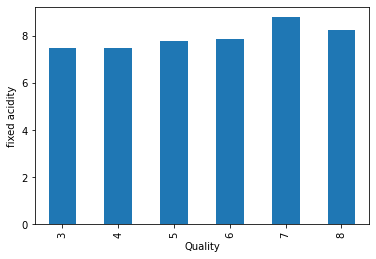

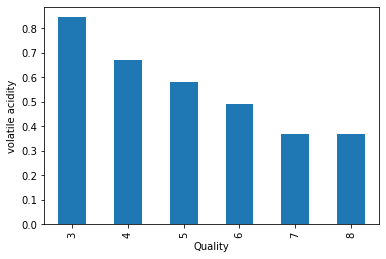

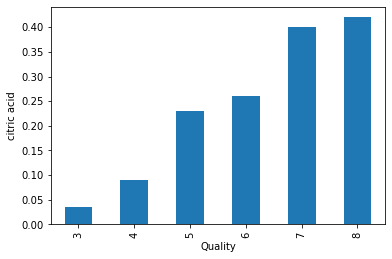

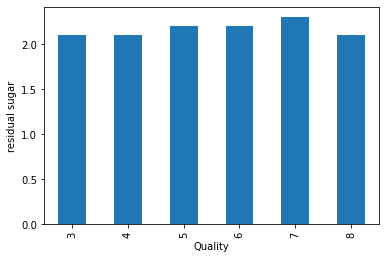

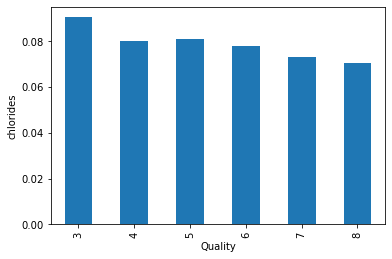

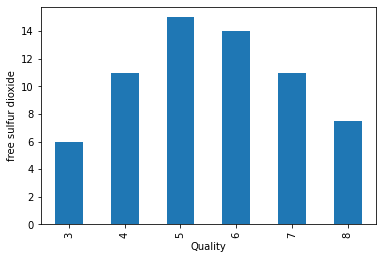

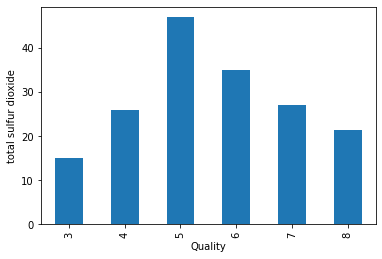

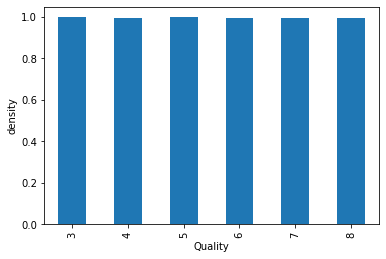

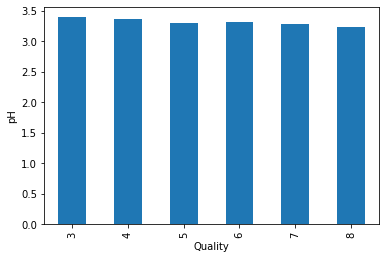

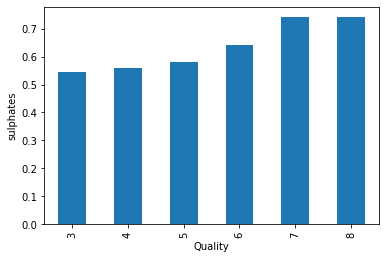

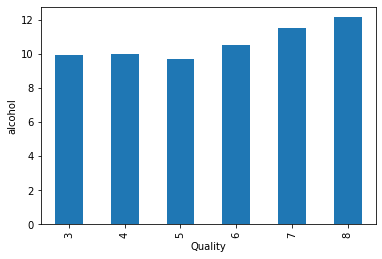

In [20]:
for predictor in list_of_columns[:-1]:
    pivoted_median[predictor].plot(kind = 'bar')
    xlabel('Quality')
    ylabel(predictor)
    show()

*The bar charts plotted above indicate that "volatile acidity" and "citric acid" have the strongest correlations with wine quality, 

*whereas "residual sugar", "density", "pH" have the weakest correlations with wine quality.

*Additionally, it seems that "total sulfur dioxide" and "free sulfur dioxide" have normal distributions relating to wine quality

### Minimum predictor values for each wine quality

In [21]:
## the minimum predictor values for each wine quality
pivoted_mins = pd.pivot_table(df_quartile, index = 'quality', values = list_of_columns, aggfunc = min)
pivoted_mins.iloc[:20, :11]

,Quality Quartile,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide
quality,,,,,,,,,,,
3,Low,8.4,0.061,0.00,0.99471,6.7,3.0,3.16,1.2,0.40,9.0
4,Low,9.0,0.045,0.00,0.99340,4.6,3.0,2.74,1.3,0.33,7.0
5,Low,8.5,0.039,0.00,0.99256,5.0,3.0,2.88,1.2,0.37,6.0
6,Medium,8.4,0.034,0.00,0.99007,4.7,1.0,2.86,0.9,0.40,6.0
7,High,9.2,0.012,0.00,0.99064,4.9,3.0,2.92,1.2,0.39,7.0
8,High,9.8,0.044,0.03,0.99080,5.0,3.0,2.88,1.4,0.63,12.0


### Maximum predictor values for each wine quality

In [22]:
## the maximum predictor values for each wine quality
pivoted_mins = pd.pivot_table(df_quartile, index = 'quality', values = list_of_columns, aggfunc = max)
pivoted_mins.iloc[:20, :11]

,Quality Quartile,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide
quality,,,,,,,,,,,
3,Low,11.0,0.267,0.66,1.00080,11.6,34.0,3.63,5.7,0.86,49.0
4,Low,13.1,0.610,1.00,1.00100,12.5,41.0,3.90,12.9,2.00,119.0
5,Low,14.9,0.611,0.79,1.00315,15.9,68.0,3.74,15.5,1.98,155.0
6,Medium,14.0,0.415,0.78,1.00369,14.3,72.0,4.01,15.4,1.95,165.0
7,High,14.0,0.358,0.76,1.00320,15.6,54.0,3.78,8.9,1.36,289.0
8,High,14.0,0.086,0.72,0.99880,12.6,42.0,3.72,6.4,1.10,88.0


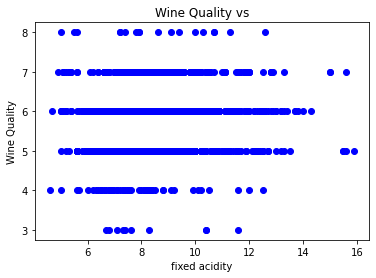

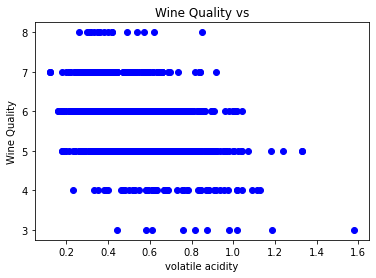

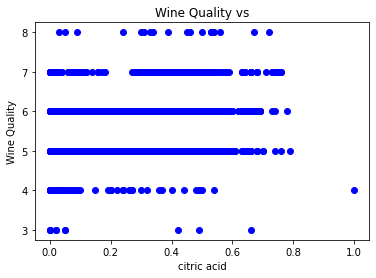

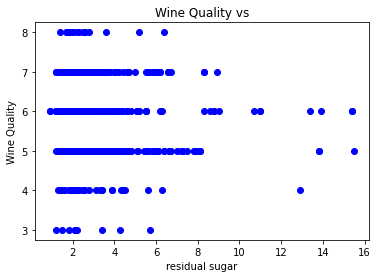

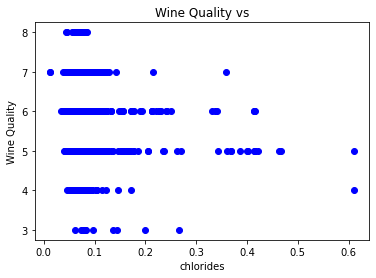

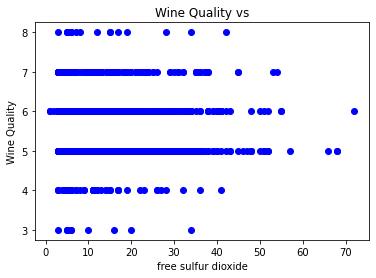

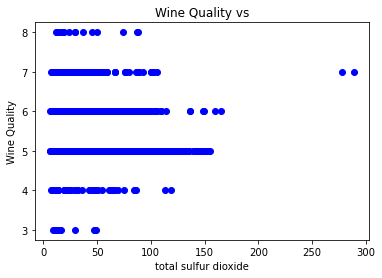

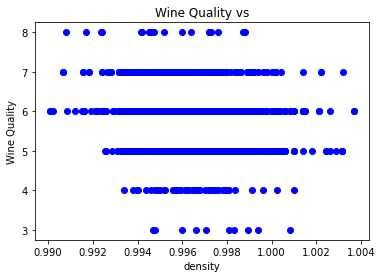

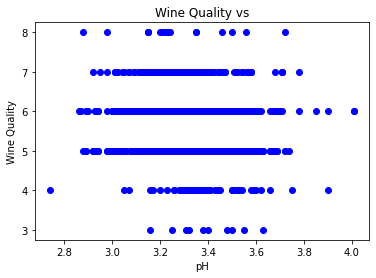

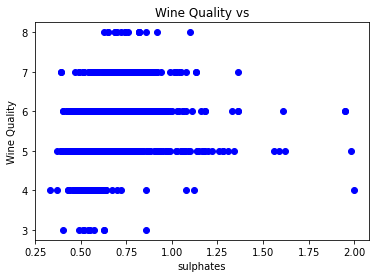

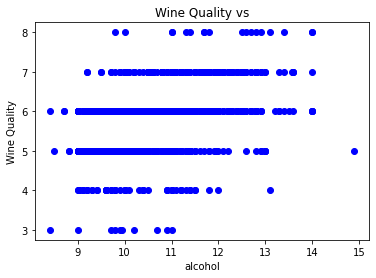

In [23]:
for predictor in df.columns.values[:-1]:
    plot(df[predictor], df['quality'], marker = 'o', color = 'blue', linestyle = 'None')
    xlabel(predictor)
    ylabel('Wine Quality')
    title('Wine Quality vs',)
    show()

# Linear Regression (big fat L)

In [24]:
import statsmodels.api as sm
from patsy import dmatrices

In [25]:
y, X = dmatrices('quality ~ alcohol + Q("fixed acidity")', data = df, return_type = 'dataframe')
y[:3]

,quality
495,8.0
1403,8.0
390,8.0


In [26]:
# Step 1 : Create the design matrices
y, X = dmatrices('quality ~ alcohol + Q("fixed acidity") + Q("volatile acidity") + Q("citric acid") + Q("residual sugar") \
                 + chlorides + Q("free sulfur dioxide") + Q("total sulfur dioxide") + density + pH + sulphates', 
                 data = df, return_type='dataframe')

In [27]:
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Sun, 08 Aug 2021   Prob (F-statistic):          1.79e-145
Time:                        20:07:43   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

quality = 0.2762*'alcohol' + 0.0250*'fixed acidity' - 1.0836*'volatile acidity' - 0.1826*'citric acid' \
+ 0.0163*'residual sugar' - 1.8742*'chlorides' + 0.0044*'free sulfur dioxide' - 0.0033*'total sulfur dioxide' \
- 17.8812*'density' - 0.4137*'pH' + 0.9163*'sulphates' + 21.9652

In [28]:
df.iloc[0]

fixed acidity           10.7000
volatile acidity         0.3500
citric acid              0.5300
residual sugar           2.6000
chlorides                0.0700
free sulfur dioxide      5.0000
total sulfur dioxide    16.0000
density                  0.9972
pH                       3.1500
sulphates                0.6500
alcohol                 11.0000
quality                  8.0000
Name: 495, dtype: float64

In [29]:
len(df)

1599

#quality = 0.2762*'alcohol' + 0.0250*'fixed acidity' - 1.0836*'volatile acidity' - 0.1826*'citric acid' \
#+ 0.0163*'residual sugar' - 1.8742*'chlorides' + 0.0044*'free sulfur dioxide' - 0.0033*'total sulfur dioxide' \
#- 17.8812*'density' - 0.4137*'pH' + 0.9163*'sulphates'

y = 600
while y < 700:
    x = 0
    while x < (len(df.iloc[y]) - 2):
        quality = 0.025*df.iloc[y][x] - 1.0836*df.iloc[y][x+1] - 0.1826*df.iloc[y][x+2] + 0.0163*df.iloc[y][x+3] \
        - 1.87428*df.iloc[y][x+4] + 0.0044*df.iloc[y][x+5] - 0.0033*df.iloc[y][x+6] - 17.8812*df.iloc[y][x+7] \
        - 0.4137*df.iloc[y][x+8] + 0.9163*df.iloc[y][x+9] + 0.2762*df.iloc[y][x+10] + 21.9652
        print("quality is", quality, "for observation number", y+1)
        x = 20
    y += 1

x = 0
while x < (len(df.iloc[0]) - 2):
    quality = 0.025*df.iloc[0][x] - 1.0836*df.iloc[0][x+1] - 0.1826*df.iloc[0][x+2] + 0.0163*df.iloc[0][x+3] \
    - 1.87428*df.iloc[0][x+4] + 0.0044*df.iloc[0][x+5] - 0.0033*df.iloc[0][x+6] - 17.8812*df.iloc[0][x+7] \
    - 0.4137*df.iloc[0][x+8] + 0.9163*df.iloc[0][x+9] + 0.2762*df.iloc[0][x+10] + 21.9652
    print("quality is", quality, "for observation number", x+1)
    x = 20

# Logistic Regression

In [30]:
df['target'] = 0.0
df['target'][df['quality'] > 5] = 1.0
df['target'].value_counts()

<ipython-input-30-903af0d0a850>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'][df['quality'] > 5] = 1.0


1.0    855
0.0    744
Name: target, dtype: int64

In [31]:
formula = 'target ~ 0 + alcohol + Q("fixed acidity") + Q("volatile acidity") + Q("citric acid") + Q("residual sugar") \
                 + chlorides + Q("free sulfur dioxide") + Q("total sulfur dioxide") + density + pH + sulphates'

In [32]:
Y, X = dmatrices(formula, df, return_type='dataframe')
y = Y['target'].values

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

/Users/junsu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
from sklearn import metrics

prediction_train = model.predict(X_train)
print(metrics.accuracy_score(y_train, prediction_train))

0.7578194816800715


In [36]:
prediction = model.predict(X_test)
print(metrics.accuracy_score(y_test, prediction))

0.7145833333333333


In [37]:
print('Number of positive examples =', len(y_train[y_train==1]))
print('Number of negative examples =', len(y_train[y_train==0]))

Number of positive examples = 606
Number of negative examples = 513


In [38]:
model.coef_

array([[ 0.91445287, -0.0271319 , -3.18516846, -0.73765978,  0.11956873,
        -1.0821825 ,  0.02876483, -0.02008184, -1.04314456, -1.70228709,
         1.8598514 ]])

In [39]:
weights = Series(model.coef_[0],
                 index=X.columns.values)
weights.sort_values()

Q("volatile acidity")       -3.185168
pH                          -1.702287
chlorides                   -1.082183
density                     -1.043145
Q("citric acid")            -0.737660
Q("fixed acidity")          -0.027132
Q("total sulfur dioxide")   -0.020082
Q("free sulfur dioxide")     0.028765
Q("residual sugar")          0.119569
alcohol                      0.914453
sulphates                    1.859851
dtype: float64

*The bar charts plotted above indicate that "volatile acidity" and "citric acid" have the strongest correlations with wine quality, 

*whereas "residual sugar", "density", "pH" have the weakest correlations with wine quality.

*Additionally, it seems that "total sulfur dioxide" and "free sulfur dioxide" have normal distributions relating to wine quality

In [42]:
formula2 = 'target ~ 0 + alcohol + Q("fixed acidity") + Q("volatile acidity") + Q("citric acid") + \
                 chlorides + Q("free sulfur dioxide") + Q("total sulfur dioxide") + sulphates'

In [43]:
Y2, X2 = dmatrices(formula2, df, return_type='dataframe')
y2 = Y2['target'].values

In [44]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=1)

In [45]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
result2 = model2.fit(X_train2, y_train2)

/Users/junsu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
from sklearn import metrics

prediction_train2 = model2.predict(X_train2)
print(metrics.accuracy_score(y_train2, prediction_train2))

0.7578194816800715


In [47]:
prediction2 = model2.predict(X_test2)
print(metrics.accuracy_score(y_test2, prediction2))

0.7208333333333333


In [48]:
print('Number of positive examples =', len(y_train2[y_train2==1]))
print('Number of negative examples =', len(y_train2[y_train2==0]))

Number of positive examples = 606
Number of negative examples = 513


In [49]:
model2.coef_

array([[ 0.95645734,  0.09568928, -2.86229815, -0.44133545, -1.20537065,
         0.0313856 , -0.01771144,  2.05053805]])

In [50]:
weights2 = Series(model2.coef_[0],
                 index=X2.columns.values)
weights2.sort_values()

Q("volatile acidity")       -2.862298
chlorides                   -1.205371
Q("citric acid")            -0.441335
Q("total sulfur dioxide")   -0.017711
Q("free sulfur dioxide")     0.031386
Q("fixed acidity")           0.095689
alcohol                      0.956457
sulphates                    2.050538
dtype: float64

In [51]:
weights.sort_values()

Q("volatile acidity")       -3.185168
pH                          -1.702287
chlorides                   -1.082183
density                     -1.043145
Q("citric acid")            -0.737660
Q("fixed acidity")          -0.027132
Q("total sulfur dioxide")   -0.020082
Q("free sulfur dioxide")     0.028765
Q("residual sugar")          0.119569
alcohol                      0.914453
sulphates                    1.859851
dtype: float64

In [52]:
formula3 = 'target ~ 0 + Q("volatile acidity") + Q("citric acid")'

In [53]:
Y3, X3 = dmatrices(formula3, df, return_type='dataframe')
y3 = Y3['target'].values

In [54]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=1)

In [55]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()
result3 = model3.fit(X_train3, y_train3)

In [56]:
from sklearn import metrics

prediction_train3 = model3.predict(X_train3)
print(metrics.accuracy_score(y_train3, prediction_train3))

0.6568364611260054


In [57]:
prediction3 = model3.predict(X_test3)
print(metrics.accuracy_score(y_test3, prediction3))

0.6166666666666667


In [58]:
print('Number of positive examples =', len(y_train3[y_train3==1]))
print('Number of negative examples =', len(y_train3[y_train3==0]))

Number of positive examples = 606
Number of negative examples = 513


In [59]:
model3.coef_

array([[-3.82520649, -0.16763594]])

In [60]:
weights3 = Series(model3.coef_[0],
                 index=X3.columns.values)
weights3.sort_values()

Q("volatile acidity")   -3.825206
Q("citric acid")        -0.167636
dtype: float64

## Attempt to increase test accuracy

In [5]:
#accuracy with the top 4 variables with the highest abs coef will be the highest
#deleting other variables or adding them only increase by a little bit 
formula4 = 'target ~ 0 + alcohol + Q("volatile acidity") + Q("citric acid")\
                 + chlorides + sulphates'

In [8]:
Y4, X4 = dmatrices(formula4, df, return_type='dataframe')
y4 = Y4['target'].values

In [9]:
from sklearn.model_selection import train_test_split
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.3, random_state=1)

In [10]:
from sklearn.linear_model import LogisticRegression
model4 = LogisticRegression()
result4 = model4.fit(X_train4, y_train4)

In [11]:
from sklearn import metrics
prediction_train4 = model4.predict(X_train4)
print(metrics.accuracy_score(y_train4, prediction_train4))

0.7479892761394102


In [12]:
prediction4 = model4.predict(X_test4)
print(metrics.accuracy_score(y_test4, prediction4))

0.7145833333333333


In [13]:
weights4 = Series(model4.coef_[0],
                 index=X4.columns.values)
weights4.sort_values()

Q("volatile acidity")   -3.268813
chlorides               -0.912384
Q("citric acid")        -0.434455
alcohol                  1.027102
sulphates                1.943149
dtype: float64